## Project Code
Group Member: Layton Liu, Tommy Kong, Gary Lin

Objective: In this project, we will analyze the aviation accident over 1919-2023 and the causing factors behind.

Source: https://www.kaggle.com/datasets/warcoder/civil-aviation-accidents

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

Since the data contains some incomprehensible value, we need to eliminate them first.

In [2]:
naValues = ['date unk.', 'unknown', 'Unknown country', '?']
data = pd.read_csv('aviation-accident.csv', na_values=naValues)
print(f'Original shape: {data.shape}')
data.dropna(subset=['date', 'fatalities', 'country'], axis=0, inplace=True)
data.shape

Original shape: (23917, 9)


(19825, 9)

The values in "fatalities" and "categories" are hard to read, thus we developed three functions to help us handle these values. We also developed an extra function to get the "season" when the accident happened based on the "date". These four functions are shown as follows:

In [3]:
def toInt(strValue):
    try:
        intValue = int(strValue)
        return intValue
    except Exception:
        return sum(map(int, re.findall('\d+', strValue)))

In [4]:
def catDetails(strValue):
    accidentCat = {'A': 'Accident', 'I': 'Incident', 'H': 'Hijacking', 'C': 'Criminal Occurrence', 'O': 'Other Occurrence', 'U': 'Unknown'}
    convertedValue = ''

    convertedValue += accidentCat.get(strValue[0])

    return convertedValue


In [5]:
def damDetails(strValue):
    accidentDam = {'1': 'hull-loss', '2': 'repairable damage'}
    convertedValue = ''

    convertedValue += accidentDam.get(strValue[1])

    return convertedValue

In [6]:
def getSeason(date):
    month = date.month

    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    elif month in [12, 1, 2]:
        return 'Winter'

Before analyzing the data, we organized it to increase readablity.

In [7]:
data['year'] = data['year'].astype('int64')
data['date'] = pd.to_datetime(data['date'], format='%d-%b-%Y', errors='coerce')
data['fatalities'] = data['fatalities'].map(toInt)
data = data.rename(columns={'cat':'category'})
data['damage'] = data['category'].map(damDetails)
data['category'] = data['category'].map(catDetails)
data['season'] = data['date'].map(getSeason)

In [8]:
data = data.set_index(['year'])
data.head()

,date,type,registration,operator,fatalities,location,country,category,damage,season
year,,,,,,,,,,
1919,1919-08-02,Caproni Ca.48,NaN,Caproni,14,Verona,Italy,Accident,hull-loss,Summer
1919,1919-08-11,Felixstowe Fury,N123,RAF,1,near Felixtowe RNAS,U.K.,Accident,hull-loss,Summer
1920,1920-02-23,Handley Page O/7,G-EANV,Handley Page Transport,0,"Acadia Siding, C...",South Africa,Accident,hull-loss,Winter
1920,1920-02-25,Handley Page O/400,G-EAMC,Handley Page Transport,0,near El Shereik,Sudan,Accident,hull-loss,Winter
1920,1920-06-30,Handley Page O/400,G-EAKE,Handley Page Transport,0,ÃstanÃ¥,Sweden,Accident,hull-loss,Summer


In [9]:
data.to_csv('cleaned.csv')
data.dtypes

date            datetime64[ns]
type                    object
registration            object
operator                object
fatalities               int64
location                object
country                 object
category                object
damage                  object
season                  object
dtype: object

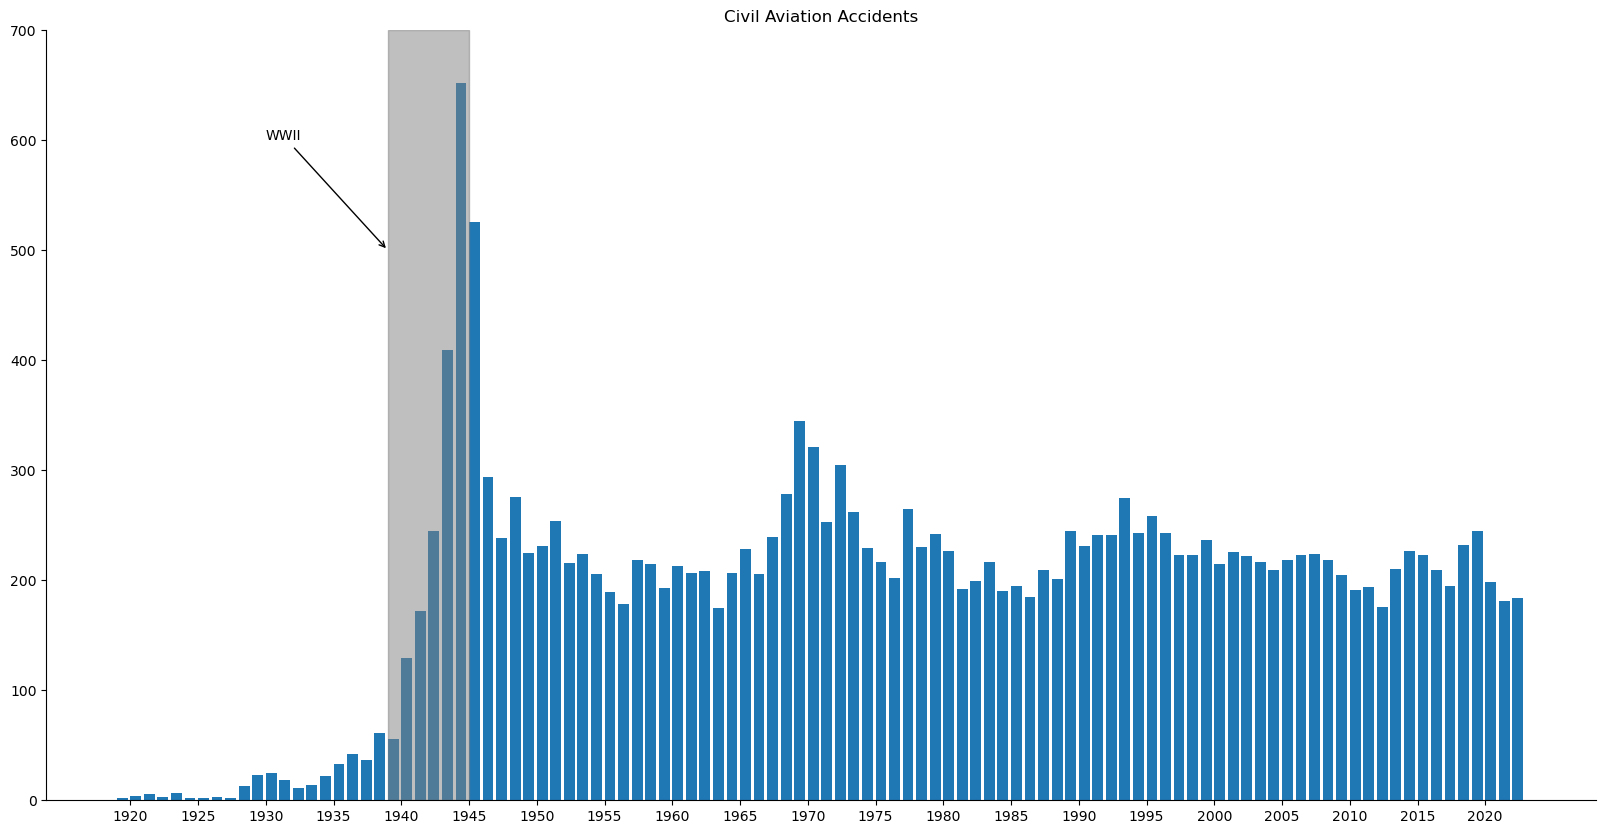

In [10]:
fig, ax = plt.subplots(figsize=(20,10))
ax.hist(data.index, bins=data.iloc[-1].name-data.iloc[0].name, width=0.8)

ax.set_xticks(np.arange(1920, 2023, 5))
ax.set_ylim(0, 700)
plt.axvspan(1939, 1945, color='grey', alpha=0.5)

ax.set_title('Civil Aviation Accidents')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.annotate('WWII', xy=(1939, 500), xytext=(1930, 600), arrowprops={'facecolor':'black',  'arrowstyle':'->'})

plt.show()